<h1>Question 1</h1>
<p>To analyze the consistency of latency and end to end routes, we considered the ping and traceroute data from sequence 1</p>
<p>First, we analyzed the ping data. I compiled this data into a numpy array holding the average ping for each date and time</p>
<p>Some teams (Team 5 in particular) - did not collect the full two weeks worth of data. In these cases, I masked the numpy array
for 0 values in order to discount these entries from the mean calculation.</p>

In [1]:
import os
import csv
import numpy as np

WEB_MAP = {
    'www_cnn_com': 0,
    'www_etsy_com': 1,
    'www_facebook_com': 2,
    'www_fda_gov': 3,
    'www_letgo_com': 4,
    'www_mayoclinic_org': 5,
    'www_orange_fr': 6,
    'www_twitter_com': 7,
    'www_webmd_com': 8,
    'www_whitehouse_gov': 9,
    'www_medlineplus_gov': 5,
}

In [2]:
size = (8, 10, 14, 2)

ping_dict = np.zeros(size)
for c, team in enumerate(os.listdir("Project3CommunityData")):
    for f in os.listdir(f'Project3CommunityData/{team}/clean_data/seq1'):
          if 'ping_seq1.txt' in f:
                key = f[:-14]
                index = WEB_MAP[key]
                with open(f'Project3CommunityData/{team}/clean_data/seq1/{f}', 'r') as ping:
                    pingreader = csv.reader(ping)
                    date_index = 0
                    date = None
                    time_index = 0
                    time = None
                    count = 1
                    for row in pingreader:
                        if date and date != row[1]:
                            date_index += 1
                            date = row[1]
                            time = None
                            time_index = 0
                            count = 1
                        else:
                            date = row[1]
                            time_index = 0

                        if time and time != row[2]:
                            time_index += 1
                            time = row[2]
                            count = 1
                        else:
                            time = row[2]
                        try:
                            ping_dict[c, index, date_index, time_index] = (ping_dict[c, index, date_index, time_index] + float(row[-1])) / count
                            count += 1
                        except:
                            print(row[-1])

In [3]:
from scipy import stats

y = np.ma.masked_where(ping_dict == 0, ping_dict)

median_by_site = np.ma.median(y, axis=(0, 2, 3))

<h1>Latency Distribution By Team</h1>
<p> The 8 plots below represent each team's latency distribution. As is characteristic of network measurements, we can clearly see that each team's distribution is largely concentrated towards the left of the graph, with a long tail skewed right. Each team's graph has a very tall peak, suggesting that generally speaking, latency is quite consistent and concentrated around this point. Some teams show larger tails suggesting that the connection at their location is more volatile. For instance, Team 4's data trails off to the right much more noticeably with a shorter peak (only height around 80) and far more observations reaching to the right. This suggests that their connection is not quite as stable, perhaps because of other internet users or congestion in the area around those time. In any case, the histograms clearly seem to suggest that latency does depend heavily on location.</p>


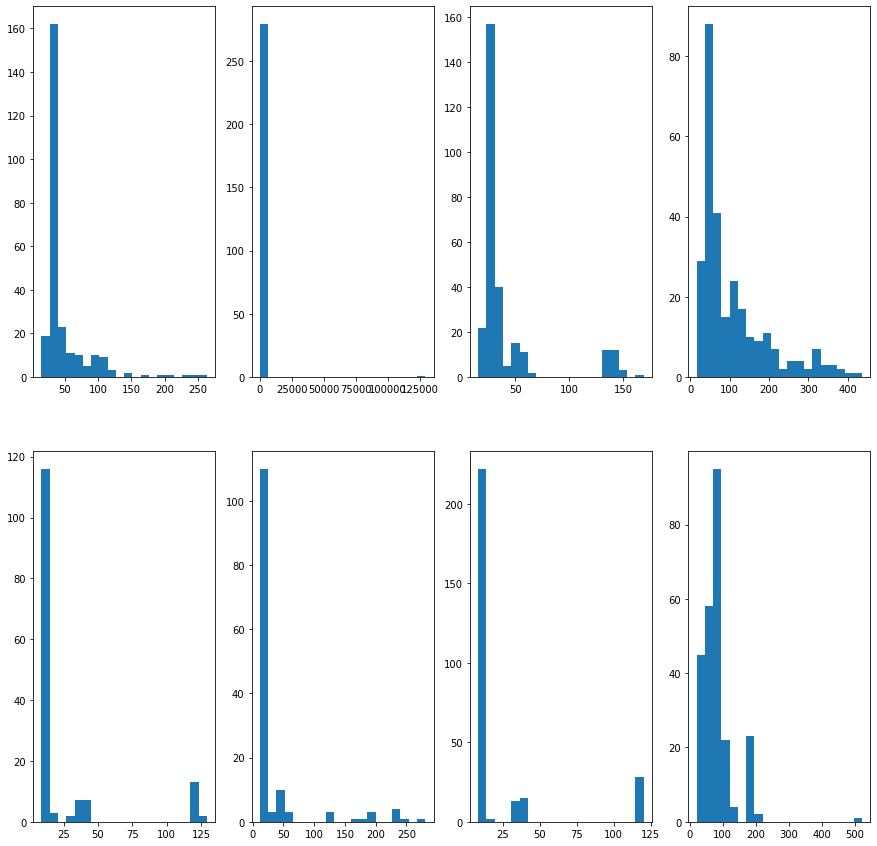

In [15]:
import matplotlib.pyplot as plt
import math

fig1, (ax1, ax2) = plt.subplots(2, 4, figsize=(15,15))

y_1 = y.reshape(8, 280)

for i in range(4):
    ax1[i].hist(y_1[i,:], bins=20)
    ax2[i].hist(y_1[i+4,:], bins=20)

The statistics calculated below back up the observations of the histogram. Based on these statistics, we can see that for the vast majority of teams, 80% of observations are within 10-20ms in terms of latency of the median, suggesting that in general, these connections are relatively stable. Team 5 and Team 6 show particularly stable connections with the majority of latency within 1-2ms of the median. Team 4 sticks out here again with a particularly volatile connection. The 80th percentile for them is more than double the median latency, suggest a particularly large tail and a lot of variance in latency from measurement to measurement.

In [18]:
min = np.ma.min(y_1, axis=1)
std = np.ma.std(y_1, axis=1)
max = np.ma.max(y_1, axis=1)
median = np.ma.median(y_1, axis=1)
eighty = np.quantile(y_1, .8, axis=1)

for i in range(8):
    print(f'Team {i+1} Stats:')
    print('Median:', median[i])
    print('80th quantile:', eighty[i])
    print('Min:', min[i])
    print('Max:', max[i], '\n')

Team 1 Stats:
Median: 35.75340909090909
80th quantile: 52.18109090909093
Std Dev: 35.60057363296419
Min: 14.654545454545454
Max: 263.42727272727274 

Team 2 Stats:
Median: 70.7965909090909
80th quantile: 86.74636363636364
Std Dev: 7700.753829634029
Min: 34.52727272727273
Max: 129170.09318181819 

Team 3 Stats:
Median: 29.26818181818182
80th quantile: 43.96909090909097
Std Dev: 34.09094656737948
Min: 15.554545454545455
Max: 168.97727272727275 

Team 4 Stats:
Median: 68.08636363636363
80th quantile: 159.94545454545462
Std Dev: 88.45977168104785
Min: 15.972727272727274
Max: 435.70454545454544 

Team 5 Stats:
Median: 10.485227272727272
80th quantile: 11.172
Std Dev: 33.292529125272104
Min: 8.969090909090909
Max: 129.25 

Team 6 Stats:
Median: 16.069318181818183
80th quantile: 16.93104545454546
Std Dev: 56.236641448778876
Min: 11.65181818181818
Max: 280.45454545454544 

Team 7 Stats:
Median: 9.602727272727272
80th quantile: 18.140363636363926
Std Dev: 32.89867666863709
Min: 8.29727272727272

<h1>Latency Distribution by Website</h1>
Here, we have latency distributions for each of the 10 websites used in sequence 1. The first thing we notice is that each of the graphs are very similar, (except for Etsy, which is skewed by one very far off value). From the graphs we can also clearly see two peaks in many of these histograms, perhaps because of Team 4's greater latency and more irregular distribution. One clear observation we can make from the graphs is that orange.fr (graph 8) demonstrates significantly higher latency than any of the other sites. This makes sense as most, if not all of the other sites are based in the United States, so we would expect network latency to them to shorter than it would be to a site based in France.

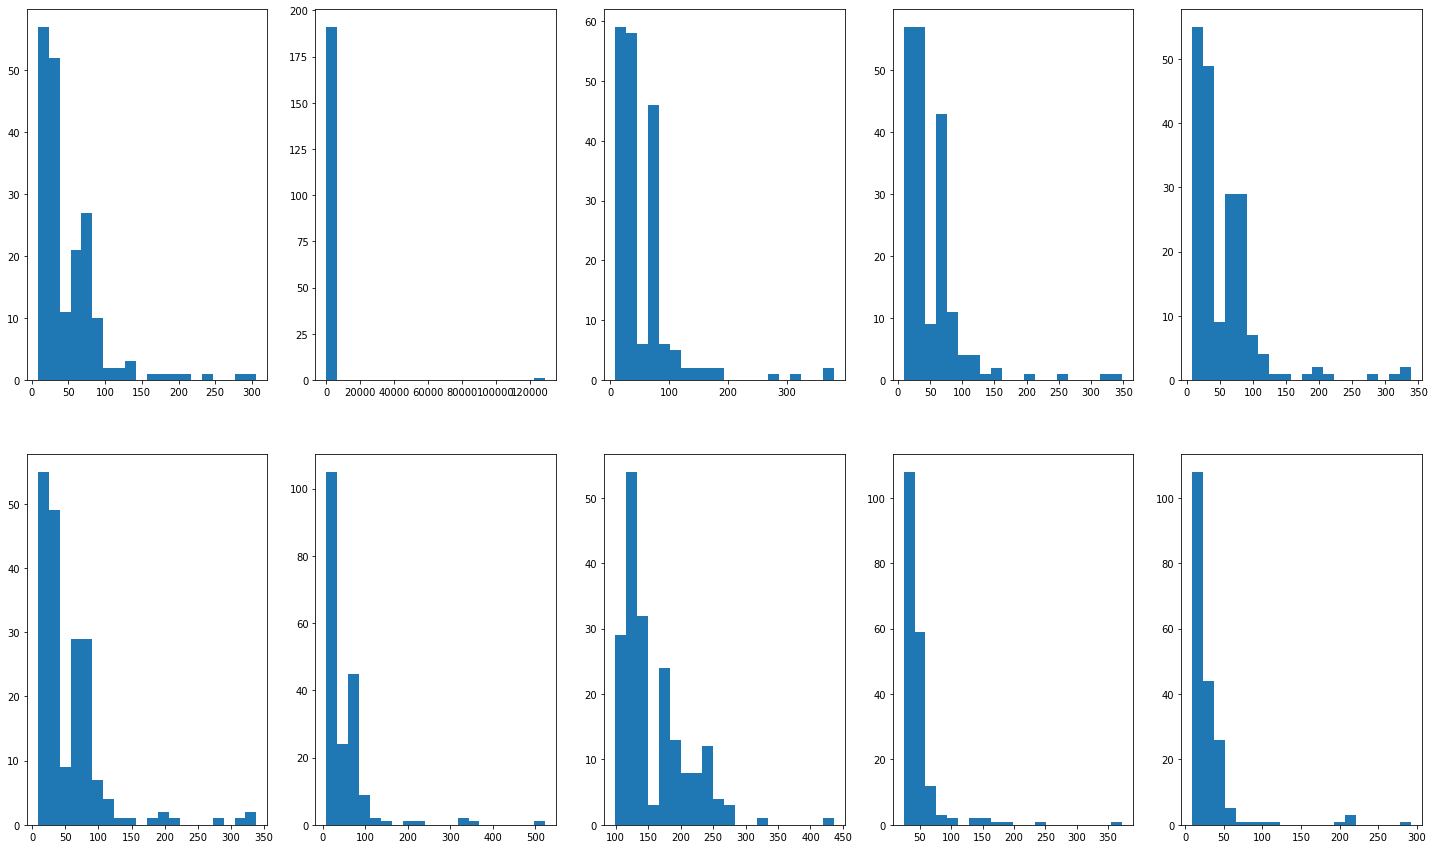

In [19]:
fig1, (ax1, ax2) = plt.subplots(2, 5, figsize=(25,15))

y_1 = np.transpose(y, (1, 0, 2, 3))

y_1 = y_1.reshape(10, -1)

for i in range(5):
    ax1[i].hist(y_1[i,:], bins=20)
    ax2[i].hist(y_1[i+4,:], bins=20)

In [91]:
size = (8, 10, 56)

traceroute_dict = np.zeros(size)
for i in range(8):
    website_dict.append({})
for c, team in enumerate(os.listdir("Project3CommunityData")):
    for f in os.listdir(f'Project3CommunityData/{team}/clean_data/seq1'):
          if 'tr1_seq1.txt' in f:
                key = f[:-13]
                index = WEB_MAP[key]
                with open(f'Project3CommunityData/{team}/clean_data/seq1/{f}', 'r') as ping:
                    pingreader = csv.reader(ping)
                    row = next(pingreader)
                    previous_trace = []
                    current_trace = []
                    counter = 0
                    while row:
                        current_trace.append(row[4][:10])
                        try:
                            row = next(pingreader)
                        except StopIteration:
                            break
                        while row and row[3] != '1':
                            current_trace.append(row[4][:10])
                            try:
                                row = next(pingreader)
                            except StopIteration:
                                break
                        if previous_trace and previous_trace != current_trace:
                            traceroute_dict[c, index, counter] = 1
                        else:
                            traceroute_dict[c, index, counter] = 0
                        counter += 1
                        previous_trace = current_trace
                        current_trace = []

In [92]:
means_by_site = np.mean(traceroute_dict, axis=(0,2))
means_by_team = np.mean(traceroute_dict, axis=(1,2))
means_by_team_by_site = np.mean(traceroute_dict, axis=2)
print(means_by_site)
print(means_by_team)
print(means_by_team_by_site)

[0.06696429 0.15401786 0.09375    0.33258929 0.16071429 0.17410714
 0.33258929 0.08705357 0.12053571 0.28348214]
[0.4375     0.15357143 0.09642857 0.15       0.10178571 0.15
 0.1875     0.16785714]
[[0.25       0.41071429 0.42857143 0.57142857 0.28571429 0.44642857
  0.73214286 0.35714286 0.44642857 0.44642857]
 [0.08928571 0.01785714 0.         0.35714286 0.         0.
  0.64285714 0.         0.03571429 0.39285714]
 [0.03571429 0.07142857 0.03571429 0.17857143 0.10714286 0.05357143
  0.125      0.10714286 0.14285714 0.10714286]
 [0.07142857 0.17857143 0.         0.51785714 0.14285714 0.17857143
  0.         0.03571429 0.01785714 0.35714286]
 [0.         0.05357143 0.03571429 0.23214286 0.23214286 0.
  0.07142857 0.125      0.03571429 0.23214286]
 [0.         0.10714286 0.05357143 0.30357143 0.17857143 0.
  0.30357143 0.         0.28571429 0.26785714]
 [0.03571429 0.23214286 0.         0.39285714 0.16071429 0.14285714
  0.55357143 0.         0.         0.35714286]
 [0.05357143 0.160714

<BarContainer object of 10 artists>

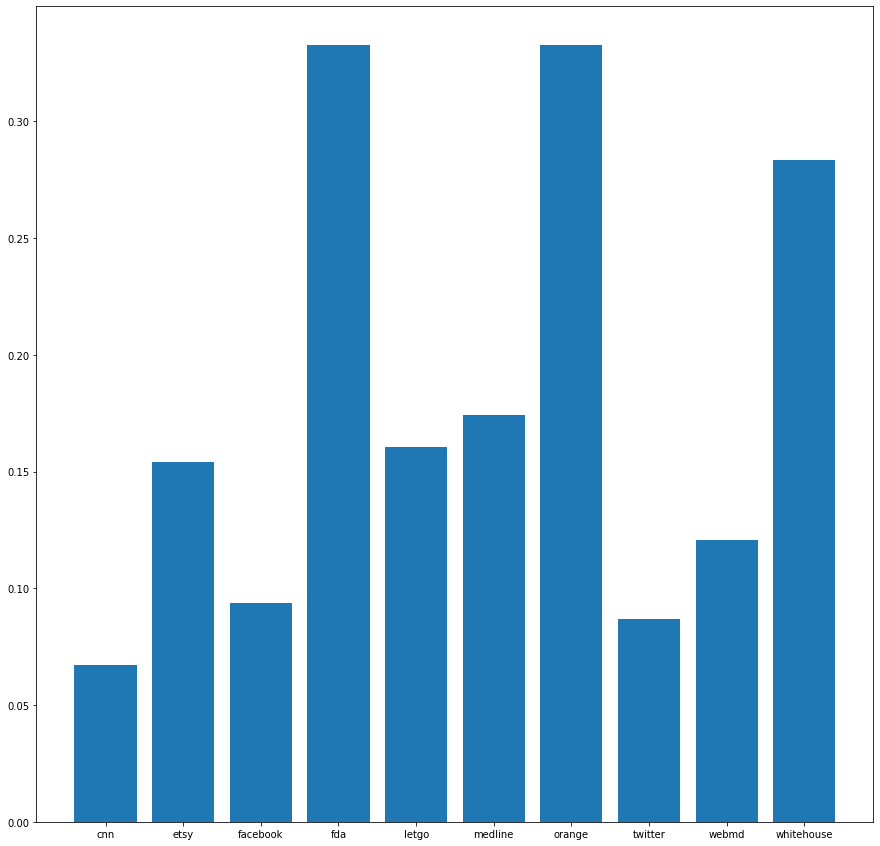

In [93]:
fig1, ax1 = plt.subplots(figsize=(15,15))

labels = ['cnn', 'etsy', 'facebook', 'fda', 'letgo', 'medline', 'orange', 'twitter', 'webmd', 'whitehouse']

ax1.bar(labels, means_by_site)

<BarContainer object of 8 artists>

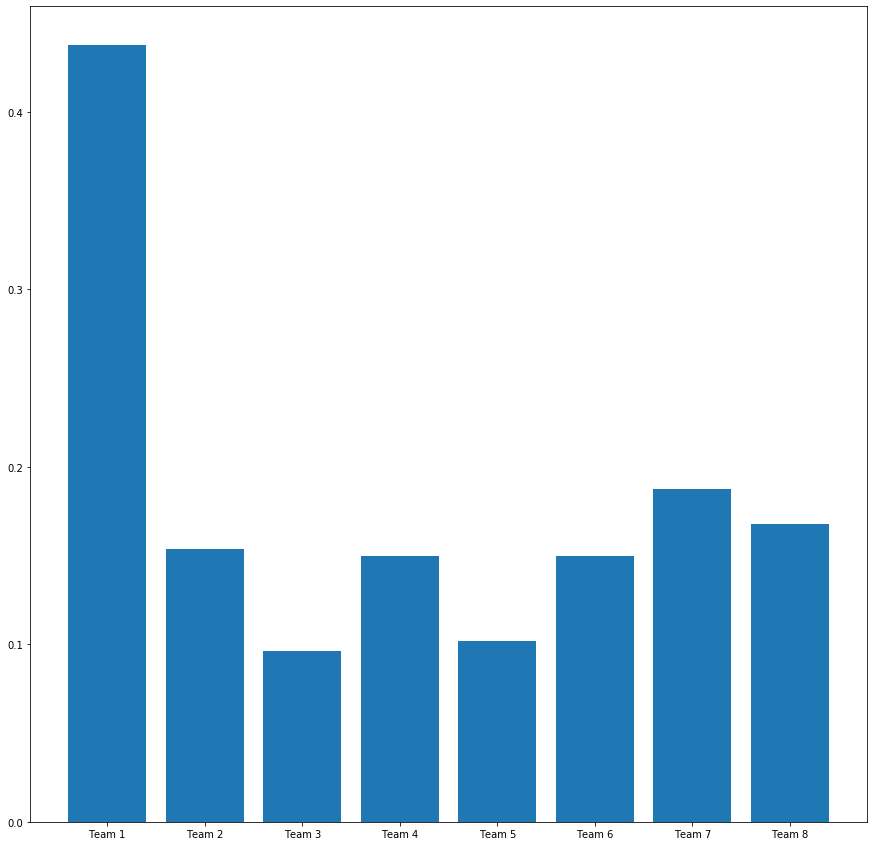

In [94]:
fig1, ax1 = plt.subplots(figsize=(15,15))

labels = [f'Team {i+1}' for i in range(8)]

ax1.bar(labels, means_by_team)

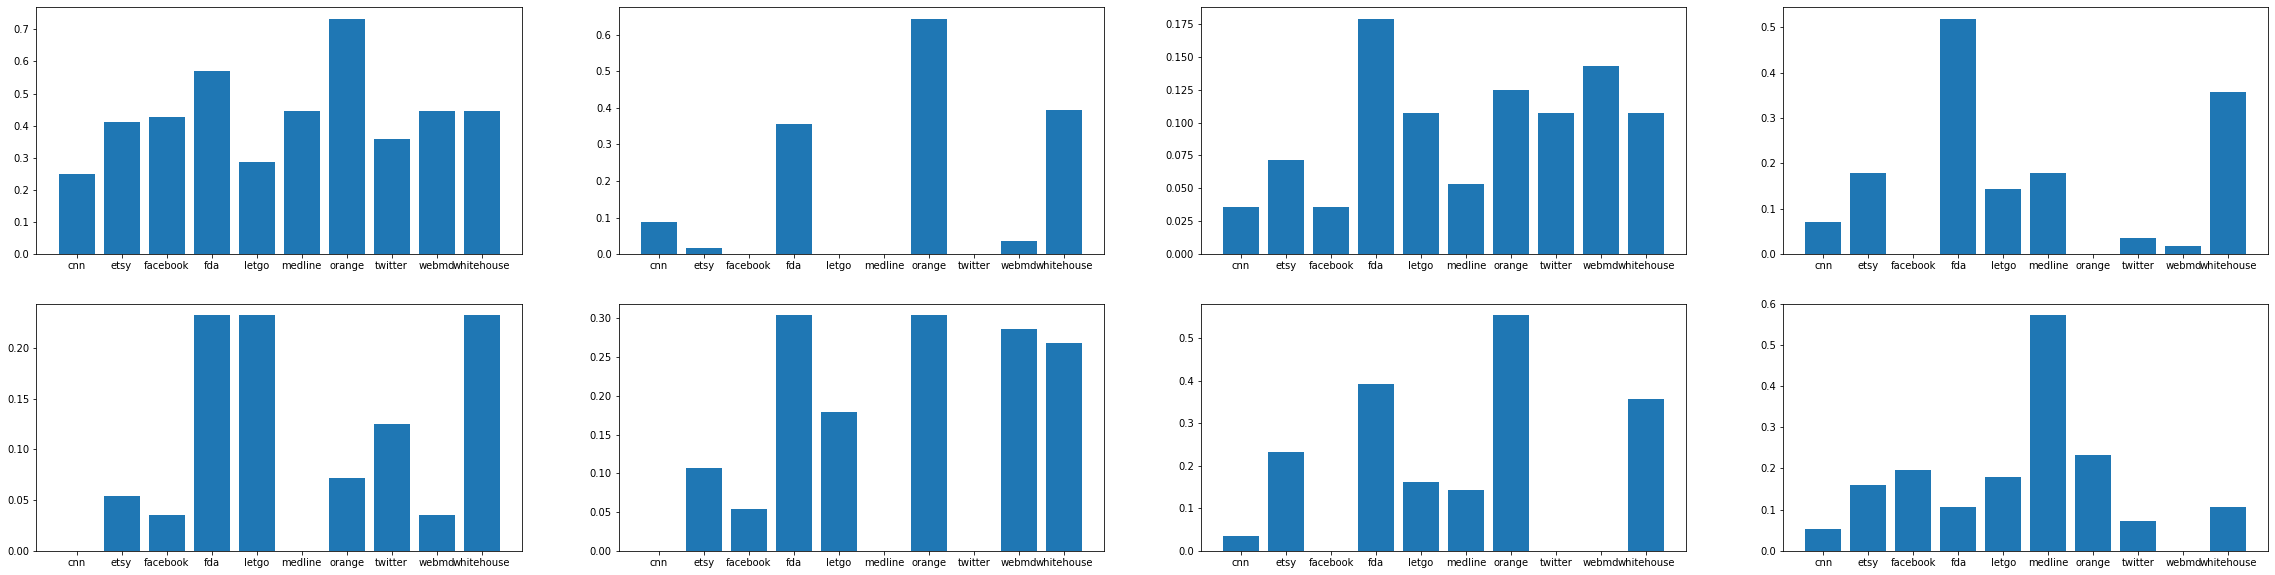

In [99]:
fig1, (ax1, ax2) = plt.subplots(2, 4, figsize=(40,10))

labels = ['cnn', 'etsy', 'facebook', 'fda', 'letgo', 'medline', 'orange', 'twitter', 'webmd', 'whitehouse']

for i in range(4):
    ax1[i].bar(labels, means_by_team_by_site[i,:])
    ax2[i].bar(labels, means_by_team_by_site[i+4,:])